# Ejerecios



# Codigo necesario para el ejercicio 1

Importamos bibliotecas

In [1]:
import torch
import torchvision
from IPython import display
from torchvision import transforms
from torch.utils import data

Creamos un dataloader

In [2]:
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=1),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=1))


Definimos una función de exactitud

In [3]:
def accuracy(y_hat, y):
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

Definimos un modelo y lo inicializamos

In [4]:
net = torch.nn.Sequential(torch.nn.Flatten(), torch.nn.Linear(784, 10))

def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

Generamos una particion en lotes para nuestros datos

In [5]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

Definimos una función de perdida

In [6]:
loss = torch.nn.CrossEntropyLoss(reduction='none')

Definimos una optimizador

In [7]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

# Ejerecio 1:

A partir del siguiente ejemplo de ciclo entrenamiento, modularizar usando las siguientes funciones: 

## Función de entrenamiento usando modularización

In [8]:
# recibe:
# net (el modelo)
# train_iter (los datos con etiquetas)
# test_iter (los datos de prueba con etiquetas)
# loss (funcion de perdida a minimizar)
# num_epoch (numero de epocas)
# updater (algoritmo de minimizacion a utilizar)
# 
# devuelve:
# metrics, contiene una lista con :
#     epoch (numero de epoca)
#     L (perdida calculada)
#     Acc (exactitud)
#     TestAcc (exactitud de los datos de prueba)

def train(net, train_iter, test_iter, loss, num_epochs, updater):
    metrics =[]
    for epoch in range(num_epochs):
        L, Acc = train_epoch(net, train_iter, loss, updater)
        TestAcc = test_accuracy(net, test_iter)
        metric = (epoch + 1, L, Acc, TestAcc)
        metrics.append(metric)
    return metrics


## Código a modularizar:

In [9]:
# recibe:
# net (el modelo)
# train_iter (los datos con etiquetas)
# loss (funcion de perdida a minimizar)
# updater (algoritmo de minimizacion a utilizar)
# 
# devuelve:
# L (perdida calculada) (debe ser un float)
# Acc (exactitud)
def train_epoch(net, train_iter, loss, updater):
  pass
  return None, None

In [10]:
# recibe:
# net (el modelo)
# test_iter (los datos de prueba con etiquetas)
# 
# devuelve:
# Acc (exactitud)
def test_accuracy(net, test_iter):
  pass
  return None

Recuerde que puede revisar el código en los notebook de las clases.

En la siguiente celda, podra ejecutar la función train para  verificar que el modelo funcione correctamente. Tenga encuenta que las métricas que obtenga las deberá usar en el próximo ejercicio.

In [11]:
num_epochs = 10
metrics = train(net, train_iter, test_iter, loss, num_epochs, trainer)

Ejercicio 2:

Graficar la salida de `train` con matplotlib

## Soluciones

In [12]:
# recibe:
# net (el modelo)
# train_iter (los datos con etiquetas)
# loss (funcion de perdida a minimizar)
# updater (algoritmo de minimizacion a utilizar)
# 
# devuelve dos:
# L (perdida calculada)
# Acc (exactitud)
def train_epoch(net, train_iter, loss, updater):
    L = 0.0
    N = 0
    Acc = 0.0
    for X, y in train_iter:
        updater.zero_grad()
        l = loss(net(X) ,y)
        l.sum().backward()
        updater.step()
        L += l.sum()
        N += l.numel()
        Acc += accuracy(net(X), y)
    L /= N
    Acc /= N
    return L.detach(), Acc

In [13]:
# recibe:
# net (el modelo)
# test_iter (los datos de prueba con etiquetas)
# 
# devuelve:
# TestAcc (exactitud de los datos de prueba)
def test_accuracy(net, test_iter):
    TestAcc = 0.0
    N = 0
    for X, y in train_iter:
        N += y.numel()
        TestAcc += accuracy(net(X), y)
    TestAcc /= N
    return TestAcc

In [14]:
import matplotlib.pyplot as plt
import numpy as np

metrics = train(net, train_iter, test_iter, loss, num_epochs, trainer)


In [15]:
plotting = np.array(metrics)

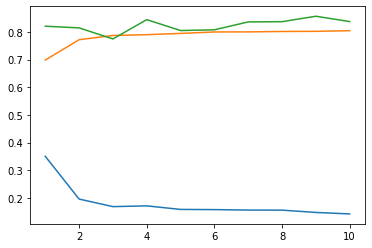

In [20]:
plt.plot(plotting.T[0], plotting.T[1]/256, plotting.T[0], plotting.T[2], plotting.T[0], plotting.T[3])